In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload\
%autoreload 2

In [ ]:
# rimuovi self loops da ego networks
# rimuovi nodi isolati quando carichi grpahRNN e digress
#  generated = [g for g in generated if len(g.nodes()) > 0]

# import mmd and compute_metrics

In [178]:
# code from GraphRNN
from mmd import compute_mmd,gaussian_emd,gaussian
from compute_metrics import get_orbit,get_clustering,get_degs
import pickle as pkl


def load_orig(name):
    assert name in ["ego","grid","sbm","planar","comm"]

    _,_, A_test = np.load("../dataset/"+name+"/"+name+"_train_val_test.npy",allow_pickle=True)
    test = []

    for A in A_test:
        test.append(nx.from_numpy_array(A))
    return test

def load_graphRNN(path):
    with open(path, "rb") as f:
        generated = pkl.load(f)
        
    ################# remove isolateed nodes
    new_g = []
    for G in generated:
        G.remove_nodes_from(list(nx.isolates(G)))
        new_g.append(G)
        
    new_g =  [g for g in new_g if len(g.nodes()) > 0]
    return new_g
    
    #return generated

def load_digress(path):
    generated = np.load(path)
    generated = [nx.from_numpy_array(generated[f"arr_{id}"]) for id in range(len(generated))][:1024]
    
    return generated

# sbm

In [180]:
orig = load_orig("sbm")
path = "../../Generate_graphs/generated/graphrnn/sbm/GraphRNN_RNN_sbm_4_128_pred_3000_1.dat"
#path = "../../Generate_graphs/generated/graphrnn/sbm/GraphRNN_RNN_sbm_4_128_test_0.dat"
graphRNN = load_graphRNN(path)[0:40]
path = "../../Generate_graphs/generated/digress/sbm_0_fullprec_resume/generated_adjs.npz"
digress = load_digress(path)

In [181]:
s1 = get_orbit(orig)
s2 = get_orbit(graphRNN)
s3 = get_orbit(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 0.1062591303424012
digress  0.006636368074777188


In [182]:
s1 = get_clustering(orig)
s2 = get_clustering(graphRNN)
s3 = get_clustering(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian, is_parallel=False, sigma=1.0))

graphRNN 0.0298442670829977
digress  0.0006015940986856538


In [183]:
s1 = get_degs(orig)
s2 = get_degs(graphRNN)
s3 = get_degs(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 0.5371163010036618
digress  0.13686845734844422


In [184]:
def within_out_com_density(graphs):
    within_com = []
    out_com = []
    c = 0 
    for g_in_ori in graphs:
        g_in = g_in_ori.copy()
        for com in list(nx.community.greedy_modularity_communities(g_in)):
            g = nx.subgraph(g_in,com)
            d = nx.density(g)
            within_com.append(d)        
            g_in.remove_edges_from(g.edges)
        c = c + 1
        out_com.append(nx.density(g_in))
     
    print(np.mean(within_com),np.std(within_com))
    print(np.mean(out_com),np.std(out_com))

In [185]:
within_out_com_density(orig)

0.29945983046425534 0.04003314125346175
0.00421408529289966 0.005614091319033995


In [186]:
within_out_com_density(graphRNN)

0.198704881720507 0.177841237526599
0.004051958891958315 0.0067549132347438905


In [187]:
within_out_com_density(digress)

0.3187625635630585 0.06231016105668801
0.010786004785933483 0.014608959650385172


In [188]:
def modularity_len_comm(graphs):
    mod = []
    len_com = []
    for g in graphs:
        com = list(nx.community.greedy_modularity_communities(g))
        mod.append(nx.community.modularity(g, com))
        len_com.append(len(com))
    return mod,len_com

In [189]:
mod_ori, len_com_ori = modularity_len_comm(orig)
mod_rnn, len_com_rnn = modularity_len_comm(graphRNN)
mod_dig, len_com_dig = modularity_len_comm(digress)

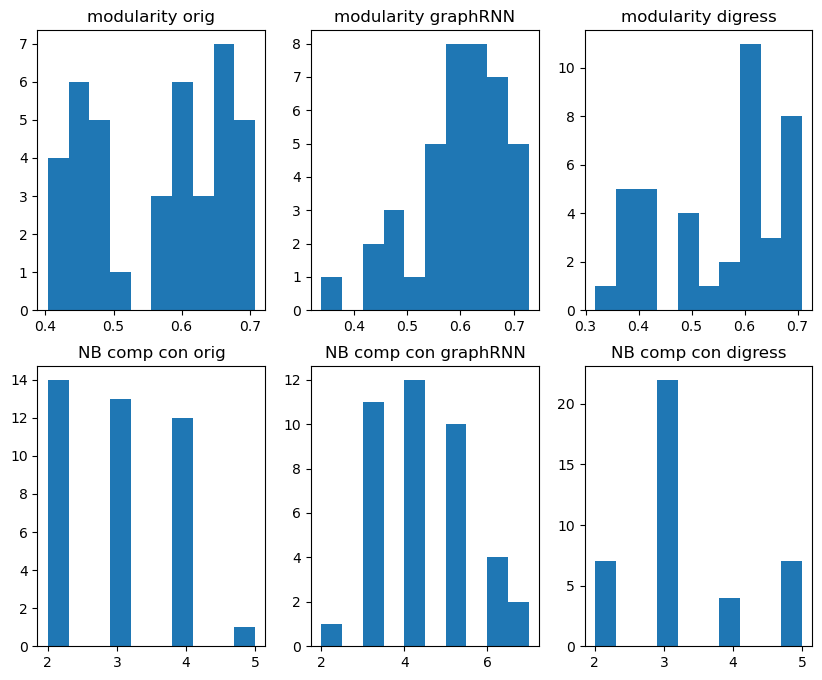

In [190]:
plt.figure(figsize=(10,8))
plt.subplot(231)
plt.title("modularity orig")
plt.hist(mod_ori)
plt.subplot(232)
plt.title("modularity graphRNN")
plt.hist(mod_rnn)
plt.subplot(233)
plt.title("modularity digress")
plt.hist(mod_dig)
plt.subplot(234)
plt.title("NB comp con orig")
plt.hist(len_com_ori)
plt.subplot(235)
plt.title("NB comp con graphRNN")
plt.hist(len_com_rnn)
plt.subplot(236)
plt.title("NB comp con digress")
plt.hist(len_com_dig)
plt.show()



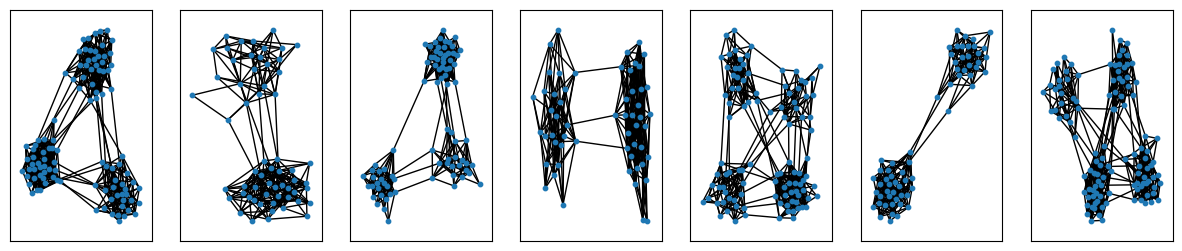

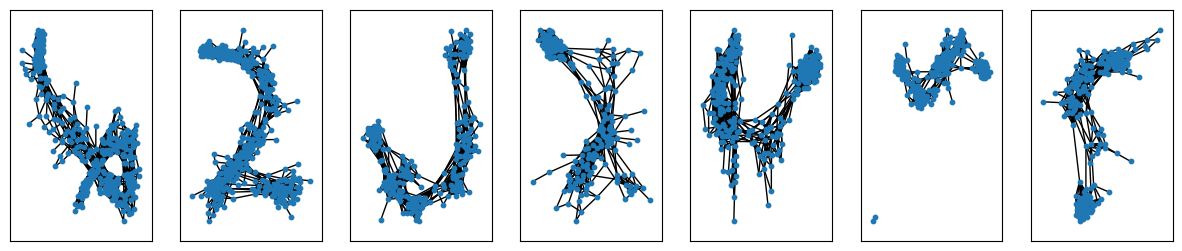

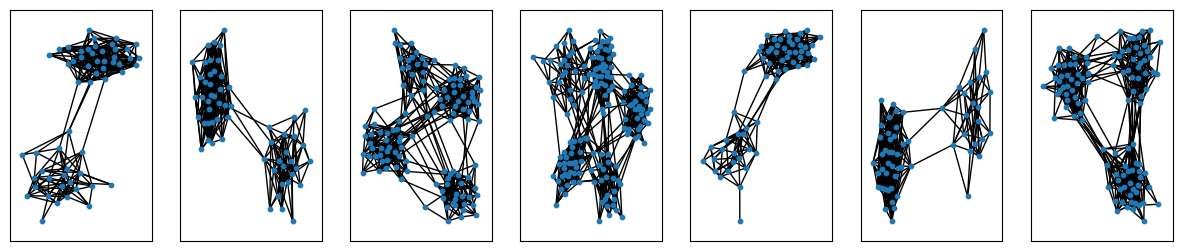

In [191]:
plt.figure(figsize=(15,3))
for i in range(7):
    plt.subplot(1,7,i+1)
    nx.draw_networkx(orig[i],with_labels=False,node_size=10)
    
plt.figure(figsize=(15,3))
for i in range(7):
    plt.subplot(1,7,i+1)
    nx.draw_networkx(graphRNN[i],with_labels=False,node_size=10)    
    
plt.figure(figsize=(15,3))
for i in range(7):
    plt.subplot(1,7,i+1)
    nx.draw_networkx(digress[i],with_labels=False,node_size=10)

# Planar evaluation

In [200]:
orig = load_orig("planar")
#path = "../../Generate_graphs/generated/graphrnn/planar/GraphRNN_RNN_planar_4_128_test_0.dat"
path = "../../Generate_graphs/generated/graphrnn/planar/GraphRNN_RNN_planar_4_128_pred_3000_1.dat"
graphRNN = load_graphRNN(path)[0:40]
path = "../../Generate_graphs/generated/digress/planar_0_fullprec_resume/generated_adjs.npz"
digress = load_digress(path)

In [193]:
s1 = get_orbit(orig)
s2 = get_orbit(graphRNN)
s3 = get_orbit(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 0.3621533919752207
digress  8.349169697452474e-05


In [194]:
s1 = get_clustering(orig)
s2 = get_clustering(graphRNN)
s3 = get_clustering(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian, is_parallel=False, sigma=1.0))

graphRNN 0.11701739019953883
digress  0.0015669868283472166


In [195]:
s1 = get_degs(orig)
s2 = get_degs(graphRNN)
s3 = get_degs(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 0.035283577171886016
digress  0.0012679108132604977


In [196]:
def is_planar(graphs):
    res = []
    for i in graphs:
        res.append(nx.is_planar(i))
        
    return sum(res)/len(res)


In [198]:
print("perc planar graphs")
print("orig",is_planar(orig))
print("rnn ",is_planar(graphRNN))
print("digr",is_planar(digress))

perc planar graphs
orig 1.0
rnn  0.0
digr 0.75


# implement a funtion to measure how much a graph is planar

# ego

In [201]:
orig = load_orig("ego")
#path = "../../Generate_graphs/generated/graphrnn/ego/GraphRNN_RNN_ego_4_128_test_0.dat"
path = "../../Generate_graphs/generated/graphrnn/ego/GraphRNN_RNN_ego_4_128_pred_3000_1.dat"
graphRNN = load_graphRNN(path)[0:40]
path = "../../Generate_graphs/generated/digress/ego_0_resume/generated_adjs.npz"
digress = load_digress(path)

In [202]:
s1 = get_orbit(orig)
s2 = get_orbit(graphRNN)
s3 = get_orbit(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 0.12034960503072578
digress  0.030602236739211808


In [203]:
s1 = get_clustering(orig)
s2 = get_clustering(graphRNN)
s3 = get_clustering(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian, is_parallel=False, sigma=1.0))

graphRNN 0.014808642231799451
digress  0.09778776101712605


In [204]:
s1 = get_degs(orig)
s2 = get_degs(graphRNN)
s3 = get_degs(digress)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))
print("digress ",compute_mmd(s1, s3, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 0.06505574418756965
digress  0.6744681831863288


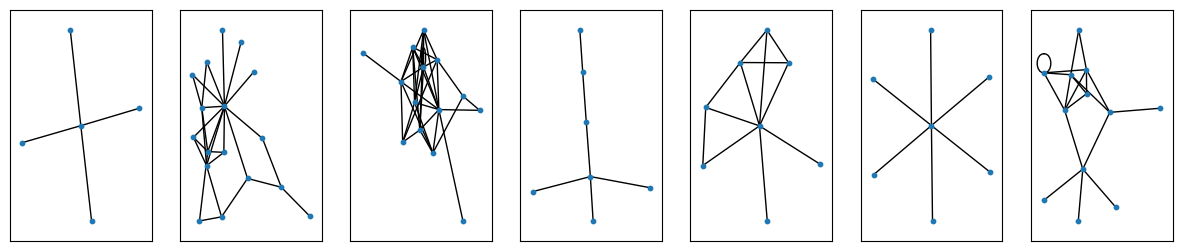

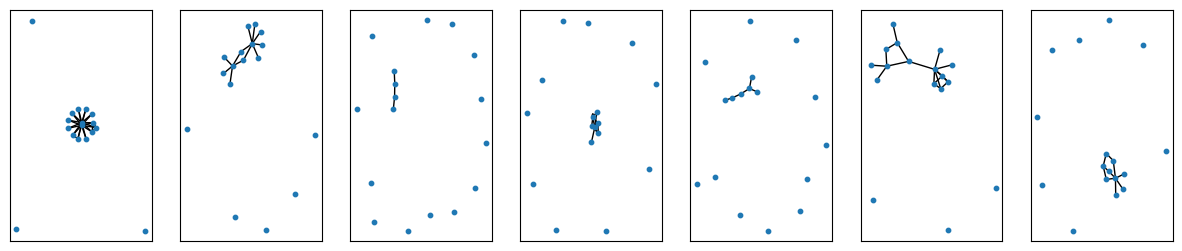

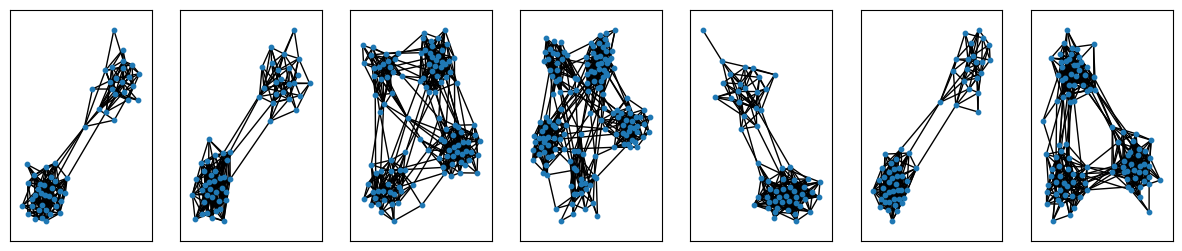

In [126]:
plt.figure(figsize=(15,3))
for i in range(7):
    plt.subplot(1,7,i+1)
    nx.draw_networkx(orig[i],with_labels=False,node_size=10)
    
plt.figure(figsize=(15,3))
for i in range(7):
    plt.subplot(1,7,i+1)
    nx.draw_networkx(graphRNN[i],with_labels=False,node_size=10)    
    
plt.figure(figsize=(15,3))
for i in range(7):
    plt.subplot(1,7,i+1)
    nx.draw_networkx(digress[i],with_labels=False,node_size=10)

# grid 

In [81]:
orig = load_orig("grid")
path = "../../Generate_graphs/generated/graphrnn/grid/GraphRNN_RNN_grid_4_128_test_0.dat"
graphRNN = load_graphRNN(path)[0:40]
#path = "../../Generate_graphs/generated/digress/"
#digress = load_digress(path)

In [82]:
s1 = get_orbit(orig)
s2 = get_orbit(graphRNN)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 1.3183533376093237e-08


In [83]:
s1 = get_clustering(orig)
s2 = get_clustering(graphRNN)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian, is_parallel=False, sigma=1.0))

graphRNN 0.0


In [84]:
s1 = get_degs(orig)
s2 = get_degs(graphRNN)
print("graphRNN",compute_mmd(s1, s2, kernel=gaussian_emd, is_parallel=False, sigma=1.0))

graphRNN 3.9001568441499046e-07


In [85]:
s2[0]

[0, 0, 4, 62, 240]

(array([  4.,   0.,   0.,   0.,   0.,  62.,   0.,   0.,   0., 240.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

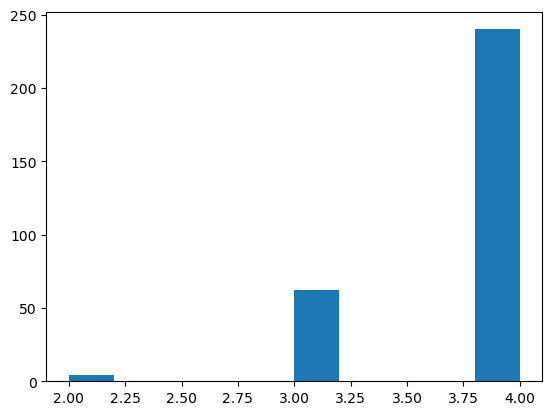

In [86]:
plt.hist(list(dict(nx.degree(graphRNN[0])).values()))

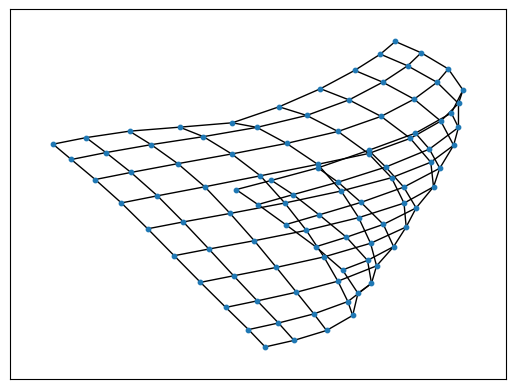

In [213]:
g = nx.grid_graph((10,10))

nx.draw_networkx(g,node_size=10,with_labels=False)

In [167]:
a = (list(dict(nx.degree(g)).values()))
np.sort(a)

array([2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4])

In [175]:
g = nx.configuration_model(a,seed=11)
aa =(list(dict(nx.degree(g)).values()))
np.sort(aa)

array([2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4])

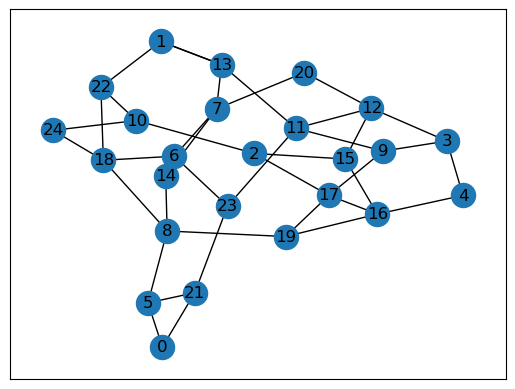

In [177]:
nx.draw_networkx(g)

/tmp/ipykernel_6945/502294549.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  plt.matshow(nx.adjacency_matrix(orig[0]).A)


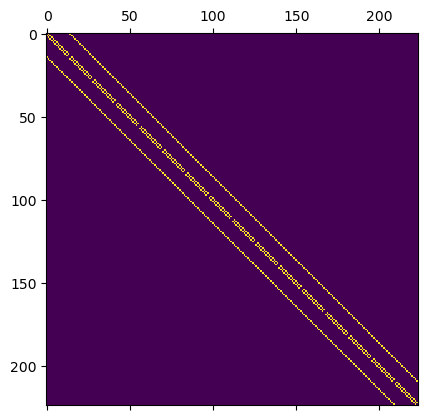

In [90]:
plt.matshow(nx.adjacency_matrix(orig[0]).A)

/tmp/ipykernel_6945/549650209.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  plt.matshow(nx.adjacency_matrix(graphRNN[10]).A)


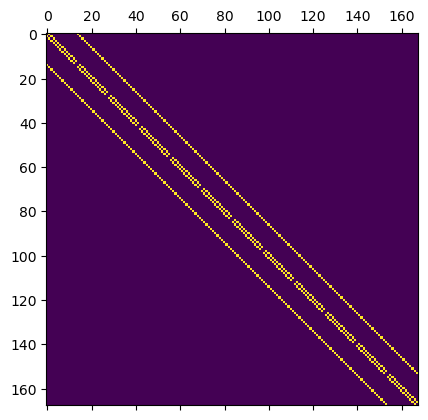

In [91]:
plt.matshow(nx.adjacency_matrix(graphRNN[10]).A)

# does the graph has triangles?

In [ ]:
generated_graph = []
MAX_nb_nodes = 20
min_nb_nodes = 15

for i in range(20):
    n = np.random.choice(np.arange(min_nb_nodes,MAX_nb_nodes))
    generated_graph.append(nx.barabasi_albert_graph(n,1))
    generated_graph.append(nx.fast_gnp_random_graph(n,0.04))

In [ ]:
def has_tringles(graph):
    count = sum(nx.cluster.triangles(graph).values())
    
    if count == 0:
        return False
    else:
        return True
    
def chack_validity_triangles(graphs):
    N = len(graphs)
    c = 0
    for graph in graphs:
        if has_tringles(graph):
            c = c + 1
            
    print(N,c)
    print(N-c, "valid graphs over",N,"graphs")
    
    return (N,c)

In [ ]:
chack_validity_triangles(generated_graph)